* https://explorer.rollux.com/address/0x8A4AA176007196D48d39C89402d3753c39AE64c1
* https://eth.blockscout.com/address/0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9
* https://pypi.org/project/Historic-Crypto/
* https://github.com/man-c/pycoingecko/tree/master

In [1]:
from blockscout import Blockscout
from blockscout import Net
from blockscout import API
from datetime import datetime
import pandas as pd
import numpy as np
import time
from copy import deepcopy
import matplotlib.pyplot as plt

sys_addr = '0x6daF055c99883D920849D7022f2EfABb13e2af57'
psys_addr = '0x6daF055c99883D920849D7022f2EfABb13e2af57'
usdc_addr = '0x368433CaC2A0B8D76E64681a9835502a1f2A8A30'

whale_addr_eth = '0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9'
whale_addr_rollux = '0x8A4AA176007196D48d39C89402d3753c39AE64c1'

tkn_addr = whale_addr_eth

eth_rpc = Blockscout(Net.ETH, API.RPC)  
eth_rest = Blockscout(Net.ETH, API.REST) 
#eth_rpc = Blockscout(Net.ROLLUX, API.RPC)  
#eth_rest = Blockscout(Net.ROLLUX, API.REST) 
tkn_addr

'0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9'

In [2]:
erc20_tkn_balances = eth_rest.get_token_balances(address = tkn_addr)

url: https://eth.blockscout.com/api/v2/addresses/0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9/token-balances


In [ ]:
#erc20_tkn_balances

In [10]:
init_tkn_balances = {}
for tkn in erc20_tkn_balances:
    if(tkn['token']['decimals'] != None):
        contract_address = tkn['token']['address'].lower()
        init_tkn_balances[contract_address] = {} if contract_address not in init_tkn_balances else {}
        init_tkn_balances[contract_address]['tkn_balance'] = int(tkn['value'])
        init_tkn_balances[contract_address]['tkn_name'] = tkn['token']['name']
        init_tkn_balances[contract_address]['tkn_symbol'] = tkn['token']['symbol']
        init_tkn_balances[contract_address]['tkn_decimal'] = int(tkn['token']['decimals'])
init_tkn_balances

{'0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': {'tkn_balance': 643511824308,
  'tkn_name': 'USD Coin',
  'tkn_symbol': 'USDC',
  'tkn_decimal': 6},
 '0x4e3fbd56cd56c3e72c1403e103b45db9da5b9d2b': {'tkn_balance': 9388841988869623653406,
  'tkn_name': 'Convex Token',
  'tkn_symbol': 'CVX',
  'tkn_decimal': 18},
 '0x6399c842dd2be3de30bf99bc7d1bbf6fa3650e70': {'tkn_balance': 88207696944926365427246,
  'tkn_name': 'Premia',
  'tkn_symbol': 'PREMIA',
  'tkn_decimal': 18},
 '0x0f2d719407fdbeff09d87557abb7232601fd9f29': {'tkn_balance': 17190682112626054526052,
  'tkn_name': 'Synapse',
  'tkn_symbol': 'SYN',
  'tkn_decimal': 18},
 '0x514910771af9ca656af840dff83e8264ecf986ca': {'tkn_balance': 265555437630000000000,
  'tkn_name': 'ChainLink Token',
  'tkn_symbol': 'LINK',
  'tkn_decimal': 18},
 '0x9dfad1b7102d46b1b197b90095b5c4e9f5845bba': {'tkn_balance': 3403029172104235787819,
  'tkn_name': 'Botto',
  'tkn_symbol': 'BOTTO',
  'tkn_decimal': 18},
 '0x090185f2135308bad17527004364ebcc2d37e5f6': {'t

In [4]:
tkn_transfers = []
page_nm = 1
pull_tkn_transfers = True
while(pull_tkn_transfers):
    erc20_tkn_transfers = eth_rpc.get_erc20_token_transfer_events_by_address(address=tkn_addr, page=page_nm, offset=0, sort="desc")
    tkn_transfers.extend(erc20_tkn_transfers['result'])
    pull_tkn_transfers = pull_tkn_transfers if len(erc20_tkn_transfers['result']) > 0 else False
    page_nm+=1

url: https://eth.blockscout.com/api?module=account&action=tokentx&address=0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9&page=1&offset=0&sort=desc
url: https://eth.blockscout.com/api?module=account&action=tokentx&address=0xDb10F3e5329509C7A84abE34f3Db8b86B6f28Fb9&page=2&offset=0&sort=desc


In [5]:
dict_transfers = {}

n_transfers = len(tkn_transfers)
c = 0
for k in range(n_transfers):
    tx = tkn_transfers[k]
    if('value' in tx):
        dict_transfers[k] = {}
        dict_transfers[k]['blk_num'] = int(tx['blockNumber'])
        dict_transfers[k]['timestamp'] = int(tx['timeStamp'])
        dict_transfers[k]['tkn_symbol'] = tx['tokenSymbol']
        dict_transfers[k]['tkn_name'] = tx['tokenName']
        dict_transfers[k]['tkn_decimal'] = int(tx['tokenDecimal'])
        dict_transfers[k]['tkn_contract_address'] = tx['contractAddress']
        dict_transfers[k]['transfer_value'] = int(tx['value'])
        transfer_value = dict_transfers[k]['transfer_value']
        tkn_decimal = dict_transfers[k]['tkn_decimal']
        dict_transfers[k]['coin_value'] = transfer_value/(10**tkn_decimal)
        dict_transfers[k]['transfer_in'] = tx['to'] == tkn_addr.lower()
        dict_transfers[k]['transfer_gas'] = int(tx['gasUsed'])
        dict_transfers[k]['transfer_hash'] = tx['hash']
        c+=1

dict_transfers = dict(sorted(dict_transfers.items(), key=lambda item: item[1]['blk_num'], reverse=True))

dict_transfers_reindex = {}
for k, old_k in enumerate(dict_transfers):
    dict_transfers_reindex[k] = dict_transfers[old_k]
dict_transfers = dict_transfers_reindex

df_transfers = pd.DataFrame.from_dict(dict_transfers_reindex, orient='index')
df_transfers.head(5)

,blk_num,timestamp,tkn_symbol,tkn_name,tkn_decimal,tkn_contract_address,transfer_value,coin_value,transfer_in,transfer_gas,transfer_hash
0,20413377,1722270023,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,59977000000,59977.00,True,45172,0x2ed0392c802469f0625316beb7fa0792ededc7a75849...
1,20413327,1722269423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,20000000000,20000.00,True,45160,0x52e61b6a23d5caa5d7845860200a30a20415c9837d3b...
2,20394049,1722037043,UЅDС,UЅD Cоin,6,0x534ae86568ec308404f26877a7cff5cf5f9ef8b3,18496960000,18496.96,False,580746,0x613f8684c9a650cc43fcea850264b0bcff75932b188f...
3,20392938,1722023639,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,18496960000,18496.96,False,62260,0x83b15f39519b638f1344a57f147252dc27191324deb1...
4,20392920,1722023423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1290000000000,1290000.00,False,45160,0x2bd4bfeed52cf66c6ddc44911dc4f8ce4a03e04068ae...


In [6]:
tkn_balances = {}
N = len(dict_transfers)
for k in range(N):
    tx = dict_transfers[k]
    tkn_contract_address = tx['tkn_contract_address']
    transfer_value = tx['transfer_value']
    transfer_in = tx['transfer_in']
    if(tkn_contract_address in init_tkn_balances):

        if tkn_contract_address not in tkn_balances:
            tkn_balances[tkn_contract_address] = {} 

        if('prev_transfer' in tkn_balances[tkn_contract_address]):
            tkn_balances[tkn_contract_address]['prev_tkn_balance'] = tkn_balances[tkn_contract_address]['tkn_balance']
            if(tkn_balances[tkn_contract_address]['prev_transfer_direction']):
                tkn_balances[tkn_contract_address]['tkn_balance'] -= tkn_balances[tkn_contract_address]['prev_transfer']
            else:    
                tkn_balances[tkn_contract_address]['tkn_balance'] += tkn_balances[tkn_contract_address]['prev_transfer']
        else:  
            tkn_balances[tkn_contract_address]['tkn_balance'] = init_tkn_balances[tkn_contract_address]['tkn_balance'] if 'tkn_balance' not in tkn_balances[tkn_contract_address] else tkn_balances[tkn_contract_address]['tkn_balance']
        
        tkn_balances[tkn_contract_address]['prev_transfer'] = transfer_value
        tkn_balances[tkn_contract_address]['prev_transfer_direction'] = transfer_in
        dict_transfers[k]['tkn_balance'] = tkn_balances[tkn_contract_address]['tkn_balance']
    

In [7]:
from blockscout import DataDict
dd = DataDict(dict_transfers)
df_transfers = dd.to_dataframe(dict_transfers)
df_transfers.head(10)

,blk_num,timestamp,tkn_symbol,tkn_name,tkn_decimal,tkn_contract_address,transfer_value,coin_value,transfer_in,transfer_gas,transfer_hash,tkn_balance
0,20413377,1722270023,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,59977000000,59977.00,True,45172,0x2ed0392c802469f0625316beb7fa0792ededc7a75849...,643511824308
1,20413327,1722269423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,20000000000,20000.00,True,45160,0x52e61b6a23d5caa5d7845860200a30a20415c9837d3b...,583534824308
2,20394049,1722037043,UЅDС,UЅD Cоin,6,0x534ae86568ec308404f26877a7cff5cf5f9ef8b3,18496960000,18496.96,False,580746,0x613f8684c9a650cc43fcea850264b0bcff75932b188f...,NaN
3,20392938,1722023639,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,18496960000,18496.96,False,62260,0x83b15f39519b638f1344a57f147252dc27191324deb1...,563534824308
4,20392920,1722023423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1290000000000,1290000.00,False,45160,0x2bd4bfeed52cf66c6ddc44911dc4f8ce4a03e04068ae...,582031784308
5,20392879,1722022919,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1020001000000,1020001.00,True,45172,0x1015f8c569d25f3b607d5a636b480f5d9891540c11ab...,1872031784308
6,20392497,1722018299,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,25000000000,25000.00,True,45160,0x3ff9b4b9b351c5a5ab1ecc696a01553fa5f0544d495c...,852030784308
7,20391905,1722011135,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,200000000000,200000.00,True,45160,0x0d5ca2ba0235a30e9d393675c80f12df5c0da525825a...,827030784308
8,20391717,1722008879,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,100000000,100.00,True,45148,0xc9721598135d287f8619516ade8f3d8378d0ea29be93...,627030784308
9,20387127,1721953547,UЅDС,UЅD Cоin,6,0x534ae86568ec308404f26877a7cff5cf5f9ef8b3,17846010000,17846.01,False,745541,0x0dff8517f8ffd51b22755372ea7656efb0775f90b421...,NaN


In [12]:
df_tkn.head(50)

,blk_num,timestamp,tkn_symbol,tkn_name,tkn_decimal,tkn_contract_address,transfer_value,coin_value,transfer_in,transfer_gas,transfer_hash,tkn_balance
0,20413377,1722270023,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,59977000000,5.997700e+04,True,45172,0x2ed0392c802469f0625316beb7fa0792ededc7a75849...,643511824308
1,20413327,1722269423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,20000000000,2.000000e+04,True,45160,0x52e61b6a23d5caa5d7845860200a30a20415c9837d3b...,583534824308
3,20392938,1722023639,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,18496960000,1.849696e+04,False,62260,0x83b15f39519b638f1344a57f147252dc27191324deb1...,563534824308
4,20392920,1722023423,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1290000000000,1.290000e+06,False,45160,0x2bd4bfeed52cf66c6ddc44911dc4f8ce4a03e04068ae...,582031784308
5,20392879,1722022919,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1020001000000,1.020001e+06,True,45172,0x1015f8c569d25f3b607d5a636b480f5d9891540c11ab...,1872031784308
6,20392497,1722018299,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,25000000000,2.500000e+04,True,45160,0x3ff9b4b9b351c5a5ab1ecc696a01553fa5f0544d495c...,852030784308
7,20391905,1722011135,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,200000000000,2.000000e+05,True,45160,0x0d5ca2ba0235a30e9d393675c80f12df5c0da525825a...,827030784308
8,20391717,1722008879,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,100000000,1.000000e+02,True,45148,0xc9721598135d287f8619516ade8f3d8378d0ea29be93...,627030784308
10,20386153,1721941751,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,70803950000,7.080395e+04,True,40372,0x470d598073469d7f2caa65075cbd5a7f10a5e65f95aa...,626930784308
11,20385908,1721938787,USDC,USD Coin,6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1300000000000,1.300000e+06,False,45160,0xf0131b8953539df134789e1076b510c74d24ceb32185...,556126834308


In [13]:
tkn_symbol = 'USDC'
df_tkn = df_transfers.loc[df_transfers['tkn_symbol'] == tkn_symbol].copy()
df_tkn.sort_values(by=['blk_num'], ascending=False, inplace=True)
dates = np.array([datetime.fromtimestamp(ts) for ts in df_tkn['timestamp'].values])
tkn_coin_balances = df_tkn['tkn_balance'].values/(10**tkn_decimal)

Text(0.5, 0, 'Date')

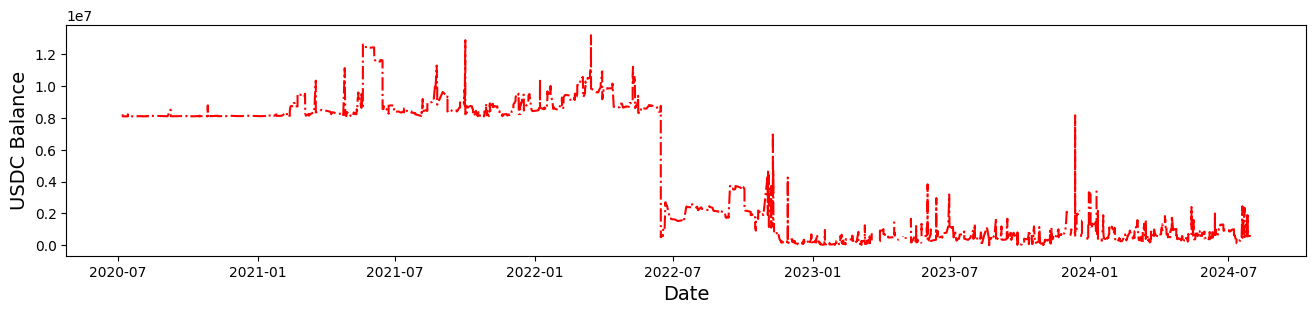

In [9]:
fig, (TKN_ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(16, 3))
TKN_ax.plot(dates, tkn_coin_balances, color = 'r',linestyle = 'dashdot', label=tkn_symbol) 
TKN_ax.set_ylabel(f'{tkn_symbol} Balance', size=14)
TKN_ax.set_xlabel('Date', size=14)